<font color='red'>**Logistic Regression**</font>

The linear (or polinomial) regression alone can't be used to solve **classification problems**. The goal in fact is no more to find a function that fits the data but to find a function that can separate them well. We can then make predictions based on training data that fall into categorical (so limited) variables. 
The first point where to start is setting, after linear regression, **cutoffs** that will take care of representing the categories. 
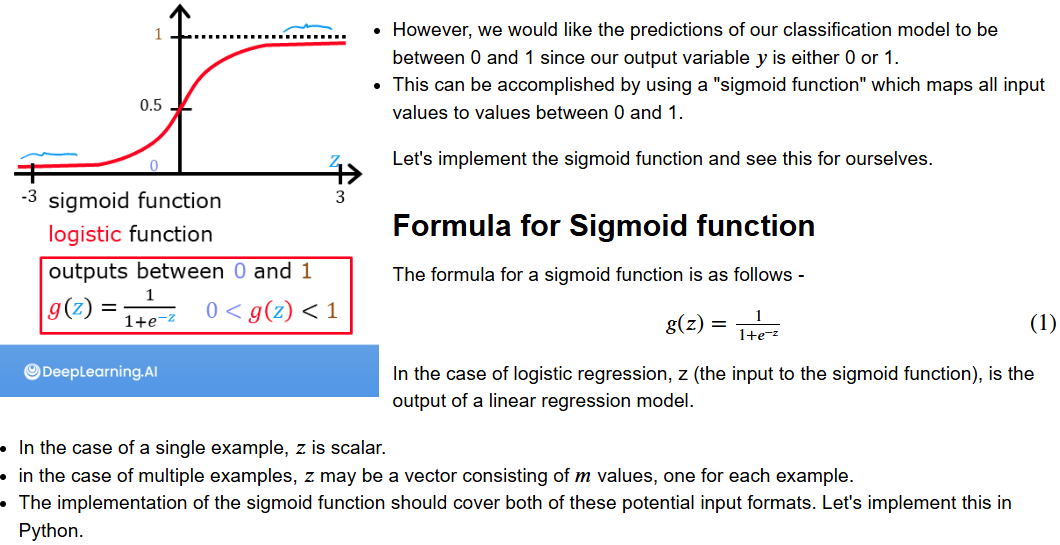

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plt_one_addpt_onclick import plt_one_addpt_onclick
from lab_utils_common import sigmoid
from lab_utils_common import draw_vthresh
# Input is an array. 
input_array = np.array([1,2,3])
exp_array = np.exp(input_array)

print("Input to exp:", input_array)
print("Output of exp:", exp_array)

# Input is a single number
input_val = 1  
exp_val = np.exp(input_val)

print("Input to exp:", input_val)
print("Output of exp:", exp_val)

Input to exp: [1 2 3]
Output of exp: [ 2.72  7.39 20.09]
Input to exp: 1
Output of exp: 2.718281828459045


In [4]:
# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10,11)

# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3) 
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


We can see that the input values to the sigmoid range from -10 to 10 and the output values range from 0 to 1.

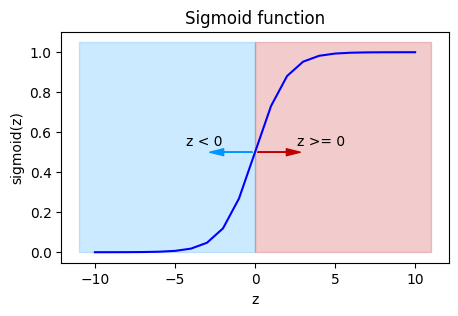

In [ ]:
# Plot z vs sigmoid(z)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax,0)

<font color='green'>**Decision Boundary**</font>

To visualize how the logistic regression is categorizing our data, we can plot a function that represent the boundary between data plotted as (score for feature 1; score for feature 2). The goal of this function is to let us appreciate visually the capacity of separating different samples into categories. 

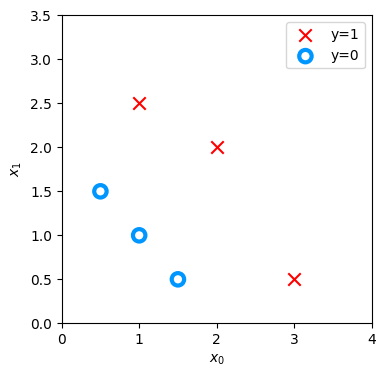

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_common import plot_data, sigmoid, draw_vthresh

X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1)
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X, y, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()


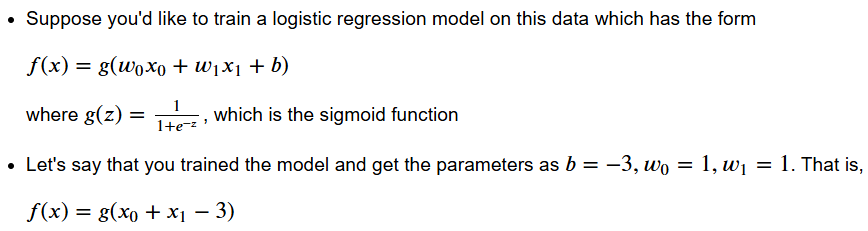
Note here that if we use a **linear function** (and so linear regression for computing w and b) we are already limiting the decision boundary to be a line. It's clear that polynomial regression here can help to get a **polynomial function** of whatever complex shape to let the decision boundary fit in the best possible way the data! (Remember feature engineering)


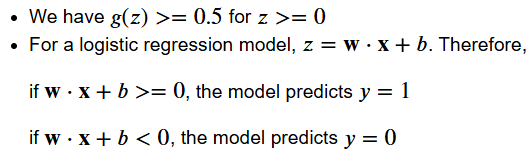

and so 𝑥1 = 3 − 𝑥0 it's our decision boundary!!

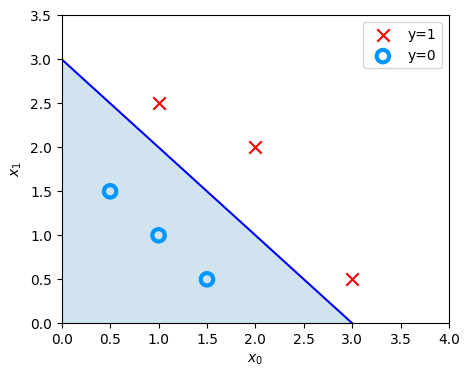

In [12]:
# Choose values between 0 and 6
x0 = np.arange(0,6)

x1 = 3 - x0
fig,ax = plt.subplots(1,1,figsize=(5,4))
# Plot the decision boundary
ax.plot(x0,x1, c="b")
ax.axis([0, 4, 0, 3.5])

# Fill the region below the line
ax.fill_between(x0,x1, alpha=0.2)

# Plot the original data
plot_data(X,y,ax)
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()

<font color='green'>**Logistic loss**</font>

When applying **squared error cost** for *logistic* regression we will find problems. Looking at the plot of the function squared error cost we can understand why... it's full of local minimum and makes much difficult for the algorithm to find a global one: 
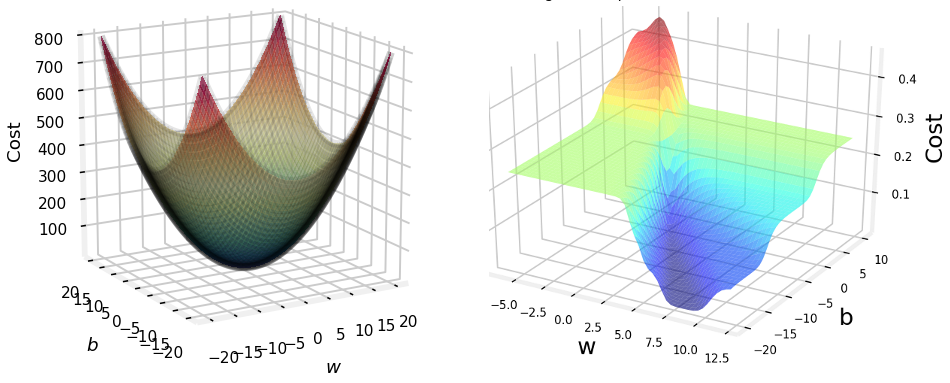
The first is for *linear* regression, the second for *logistic* regression. The reason behind this is the little difference that separate values when using the sigmoid function and the intrinsic complexity (non linear) of the shape of the function 

We can get a better shape for measuring the predictive capacity of our w, b of the model using a specific **loss function** for the categorization (where the range of the target is between 0 and 1). 

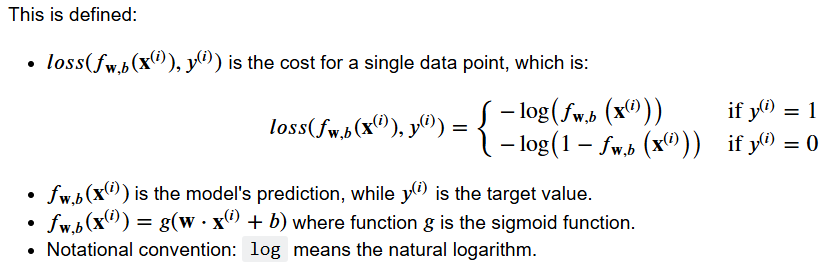

 As we can see there will be two curves, one when the ***target is 0*** and one when the ***target is 1***. When the prediction reaches the target the value of this loss function will be 0, exactly like it should. 

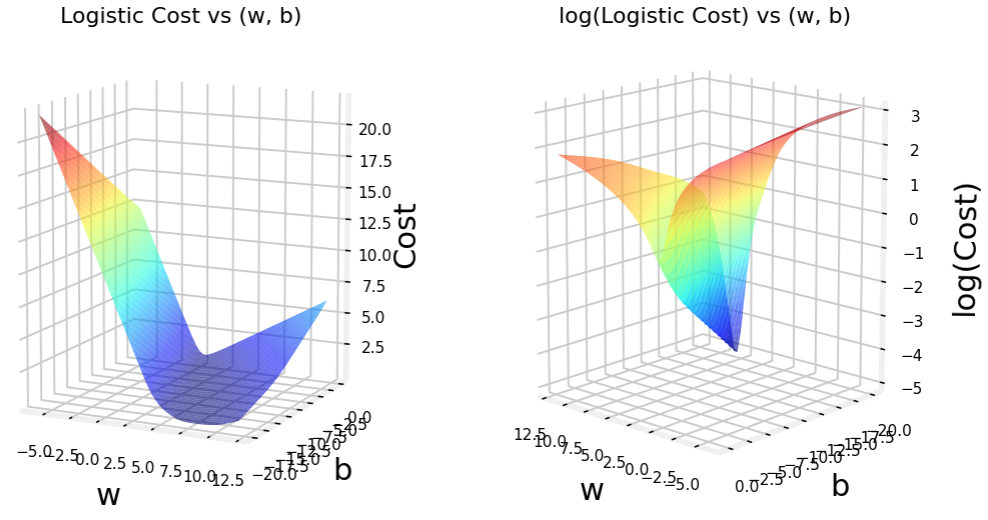